In [22]:
pip install pyod 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.ocsvm import OCSVM

In [24]:
# Generate a synthetic dataset with 1000 samples and 10 features
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

In [25]:
# Initialize the outlier detection models
knn_model = KNN()
iforest_model = IForest()
ocsvm_model = OCSVM()

In [26]:
# Fit the models to the dataset
knn_model.fit(X)
iforest_model.fit(X)
ocsvm_model.fit(X)

OCSVM(cache_size=200, coef0=0.0, contamination=0.1, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)

In [27]:
# Predict the outlier scores for each data point
knn_scores = knn_model.decision_scores_
iforest_scores = iforest_model.decision_scores_
ocsvm_scores = ocsvm_model.decision_scores_

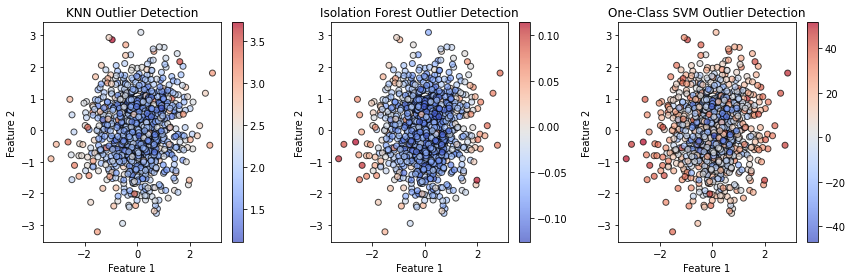

In [28]:
# Plotting the outlier detection results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=knn_scores, cmap='coolwarm', label='KNN', edgecolors='k', alpha=0.7)
plt.title('KNN Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=iforest_scores, cmap='coolwarm', label='Isolation Forest', edgecolors='k', alpha=0.7)
plt.title('Isolation Forest Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=ocsvm_scores, cmap='coolwarm', label='One-Class SVM', edgecolors='k', alpha=0.7)
plt.title('One-Class SVM Outlier Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()


### something extra for better understanding

KNN Accuracy: 0.51
Isolation Forest Accuracy: 0.48
One-Class SVM Accuracy: 0.47


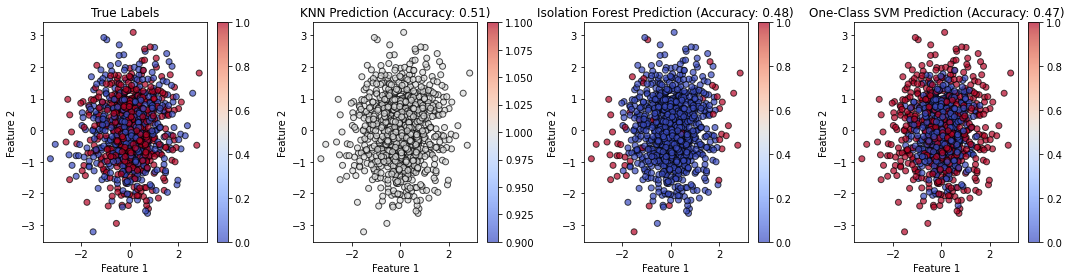

In [29]:
from sklearn.metrics import accuracy_score
# For demonstration purposes, let's randomly generate binary labels
np.random.seed(42)
y_true = np.random.choice([0, 1], size=len(X))

# Predict the labels using the outlier scores and a threshold
threshold = np.percentile(iforest_scores, 95)  # Adjust the threshold as needed

# Convert outlier scores to binary labels
knn_pred = (knn_scores > threshold).astype(int)
iforest_pred = (iforest_scores > threshold).astype(int)
ocsvm_pred = (ocsvm_scores > threshold).astype(int)

# Calculate accuracy for each model
knn_accuracy = accuracy_score(y_true, knn_pred)
iforest_accuracy = accuracy_score(y_true, iforest_pred)
ocsvm_accuracy = accuracy_score(y_true, ocsvm_pred)

# Display the accuracy of each model
print(f'KNN Accuracy: {knn_accuracy:.2f}')
print(f'Isolation Forest Accuracy: {iforest_accuracy:.2f}')
print(f'One-Class SVM Accuracy: {ocsvm_accuracy:.2f}')

# Plotting the outlier detection results with true labels
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='coolwarm', label='True Labels', edgecolors='k', alpha=0.7)
plt.title('True Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(1, 4, 2)
plt.scatter(X[:, 0], X[:, 1], c=knn_pred, cmap='coolwarm', label='KNN', edgecolors='k', alpha=0.7)
plt.title(f'KNN Prediction (Accuracy: {knn_accuracy:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(1, 4, 3)
plt.scatter(X[:, 0], X[:, 1], c=iforest_pred, cmap='coolwarm', label='Isolation Forest', edgecolors='k', alpha=0.7)
plt.title(f'Isolation Forest Prediction (Accuracy: {iforest_accuracy:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.subplot(1, 4, 4)
plt.scatter(X[:, 0], X[:, 1], c=ocsvm_pred, cmap='coolwarm', label='One-Class SVM', edgecolors='k', alpha=0.7)
plt.title(f'One-Class SVM Prediction (Accuracy: {ocsvm_accuracy:.2f})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()
